0:00:01.965819


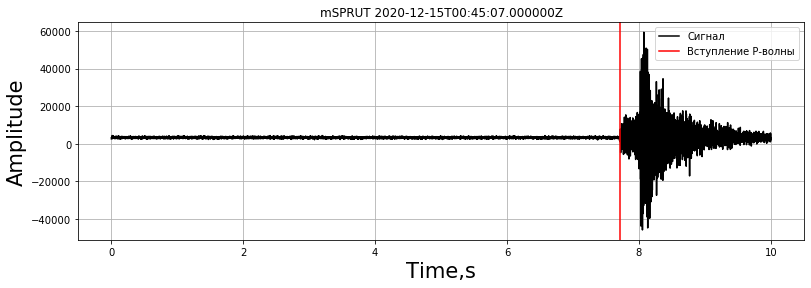

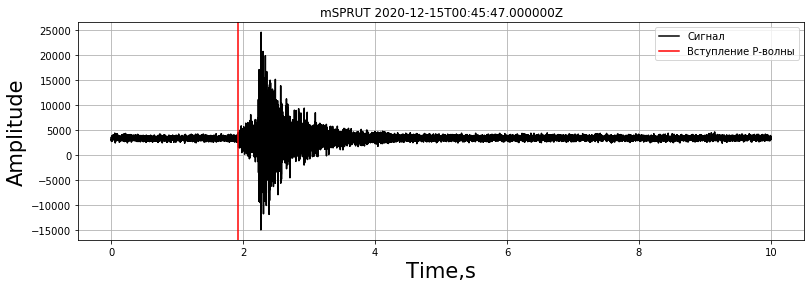

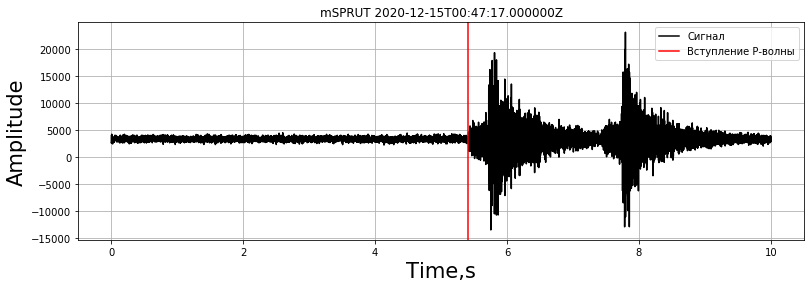

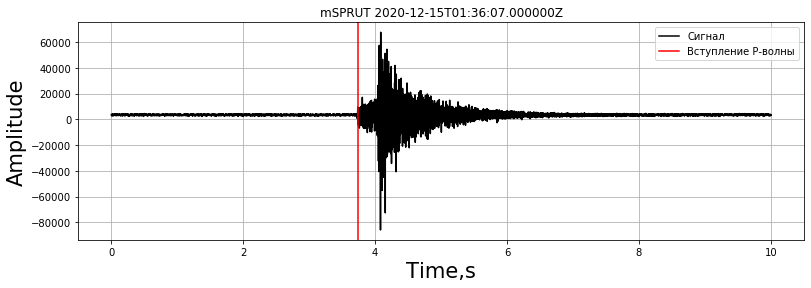

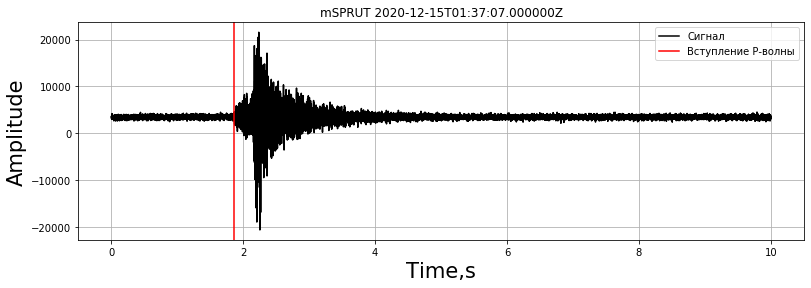

In [26]:
import os
import numpy as np
import struct as st
import matplotlib.pyplot as plt
import PphasePicker
import obspy as obs
import io
chanel_number = []
chanel_name = []
sensor_type = []
chanel_coef = []
import datetime
begin_time = datetime.datetime.now()
UTC=[] # время пикирование в UTC виде
number_channel=0 # для вызова канала всех файлов
for filename in os.listdir(r"C:\Users\GLEB2001\Питон\Записи\Записи\msm125_data"):
    if filename.endswith('.00'):
        with open(os.path.join(r"C:\Users\GLEB2001\Питон\Записи\Записи\msm125_data", filename),'rb') as f: #читаем директорию
            
#---------------------Код сВята-------------------

            chanels = st.unpack('H', f.read(2))[0] # Колличество каналов
            f.read(2)
            version = st.unpack('H', f.read(2))[0] # Версия
            day = st.unpack('H', f.read(2))[0] # День
            month = st.unpack('H', f.read(2))[0] # Месяц
            year = st.unpack('H', f.read(2))[0] # Год
            f.read(6)
            acp = st.unpack('H', f.read(2))[0] # Разрядность АЦП
            f.read(2)
            freq = st.unpack('H', f.read(2))[0] # Частота
            f.read(8)
            station_name = st.unpack('6s10c', f.read(16))[0] # Название станции
            station_name = str(station_name).replace('b', '')
            station_name = station_name.replace("'", '')
            f.read(24)
            lat = st.unpack('d', f.read(8))[0] # Широта
            long = st.unpack('d', f.read(8))[0] # Долгота
            f.read(16)
            time = st.unpack('Q', f.read(8))[0] # Начальное время
            time_start = obs.UTCDateTime(time / 256000000 + 315532800)
            f.read(8)
            for i in range(chanels): 
                chanel_number.append(st.unpack('H', f.read(2))[0]) # Номер канала
                f.read(6)
                chanel_name.append(st.unpack('6i', f.read(24))[0]) # Имя канала
                sensor_type.append(st.unpack('6i', f.read(24))[0]) # Тип сенсора
                chanel_coef.append(st.unpack('d', f.read(8))[0]) # Коэффициент канала
                f.read(8)
                
            data = np.fromfile(f, dtype='int') #читаем массивы int
            array = np.reshape(data, [32,20000], order='F') #делаем из data 32 канала
            
#------------------считаем вступление-----------------------------
            res = PphasePicker.calculatePphasePicker(array[18], 0.0005,nbins=200,Tn=0.01, to_peak=False) # меняем каналы!!!!
#calculatePphasePicker(x - Входной сигнал,dt = шаг дискретизации
# Tn - частота осциллятора до демпфирования. По умолчанию: если dt <= 0.01, то Tn = 0.01, иначе Tn = 0.1
# nbins - количество бинов построения гистограммы. По умолчанию: если dt <= 0.01, то int(2/dt), иначе 200
# to_peak - анализирует весь сигнал, а не только до максимума
            x=np.arange(0, int(len(data)/chanels)*0.0005, 0.0005) # создаём по x точки для графика
            if res[0]>=0.1:
                plt.figure(figsize=(13, 4))
                plt.plot(x, array[18],label='Сигнал',color='black') # меняем каналы!!!!
                plt.axvline(res[0],color='red',label='Вступление P-волны')
                plt.xlabel('Time,s',fontsize=21)
                plt.ylabel('Amplitude',fontsize=21)
                plt.title(station_name + ' ' + str(time_start))
                plt.grid()
                plt.legend()
                UTC.append(time_start+res[0])
print(datetime.datetime.now() - begin_time)

In [32]:
array

array([[  363158,   363900,   364937, ...,   358171,   357235,   357162],
       [   44945,    44366,    43092, ...,    43632,    43970,    43742],
       [-4906276, -4906835, -4907269, ..., -4922610, -4922585, -4922802],
       ..., 
       [   -4197,    -3999,    -3712, ...,    -3453,    -3596,    -3560],
       [   13667,    13857,    13428, ...,    13447,    13325,    13353],
       [  -15748,   -14964,   -15161, ...,   -14334,   -16034,   -15904]])